# Scikit-learn

In [235]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import plotDecisionRegions
%reload_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

`from sklearn.cross_validation import train_test_split`

已经被替代为

`from sklearn.model_selection import train_test_split`

## 初步使用
读取数据

In [236]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

划分数据集

In [237]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

数据预处理

In [238]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

训练感知器

In [239]:
ppn = Perceptron(max_iter=40,tol=1e-3,eta0=0.1,random_state=0)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

预测数据

In [240]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: {}'.format(np.sum(y_test!=y_pred)))

Misclassified samples: 4


使用准确率来评判模型

In [241]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy: 0.91


绘制决策区域

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


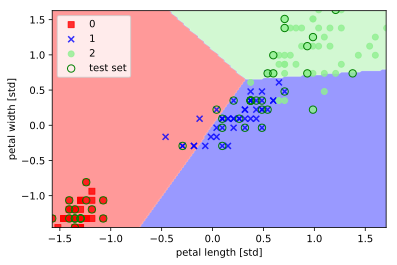

In [242]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plotDecisionRegions.plot_decision_regions(X=X_combined_std,y=y_combined,
                                         classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')

## 逻辑斯谛回归中的类别概率

sigmoid函数作为激励函数
$\phi(z)=\frac{1}{1+e^{-z}}$

绘制介于区间[-7,7]的sigmoid函数

Text(0, 0.5, '$\\phi(z)$')

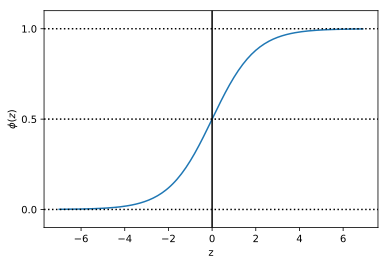

In [243]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0.0,1.0,facecolor='1.0',alpha=1.0,ls='dotted')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.axhline(y=0.0,ls='dotted',color='k')
plt.axhline(y=1.0,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')

使用scikit-learn训练逻辑斯谛回归模型

In [244]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000,random_state=0)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


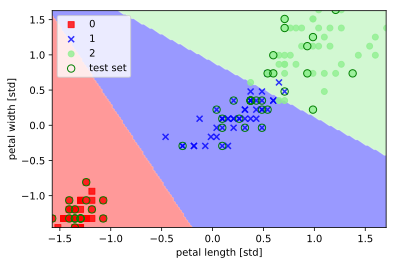

In [245]:
plotDecisionRegions.plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')

通过predict_proba方法来预测样本属于某一类别的概率

In [246]:
lr.predict_proba(X_test_std[0,:].reshape(1,2))

array([[1.78177322e-11, 6.12453348e-02, 9.38754665e-01]])

为了防止模型出现过拟合,我们通常通过正则化来解决拟合问题

最常用的正则化形式称为L2正则化
\begin{equation}
\frac{\lambda}{2}\|w\|^2=\frac{\lambda}{2}\sum_{j=1}^{m}w_j^2
\end{equation}


我们只需要在逻辑斯谛回归模型的代价函数加入上述正则化项,来降低回归系数带来的副作用,增加$\lambda$的值,可以增强正则化的强度

前面训练模型用到的参数C则是正则化系数的倒数
$$C=\frac{1}{\lambda}$$

减小正则化参数倒数C的值相当于增加正则化的强度，这可以通过绘制对两个权重系数进行L2正则化后的图像予以展示：

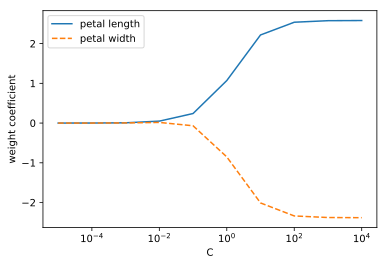

In [247]:
weights,params=[],[]
for c in [10**c for c in np.arange(-5,5, dtype=float)]:
    lr = LogisticRegression(C=c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(c)
weights=np.array(weights)
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],label='petal width',linestyle='--')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='upper left')
plt.xscale('log')

## 使用支持向量机最大化分类间隔

训练模型

注意参数$C$, 当$C$值较大时, 对应大的错误惩罚

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


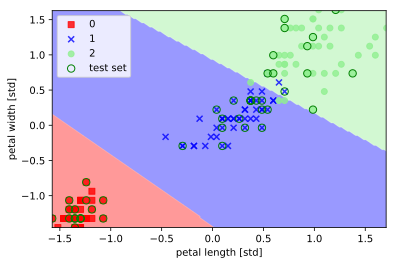

In [248]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std,y_train)
plotDecisionRegions.plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')

有些时候数据集非常巨大以致无法加载到内存中，针对这种情况，scikit-learn提供了SGDClassifier类供用户选择，这个类还通过partial_fit方法支持在线学习。使用如下:

In [249]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## 使用核SVM解决非线性问题

使用Numpy中的logical_xor函数创建一个经过'异或'操作的数据集,其中100个样本属于类别1,另外100个被划定为类别-1

In [250]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)

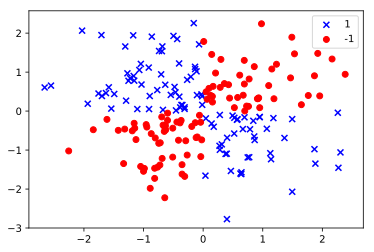

In [251]:
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='o',label='-1')
plt.ylim(-3.0)
plt.legend()

使用scikit-learn中的SVM类,来进行分类

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


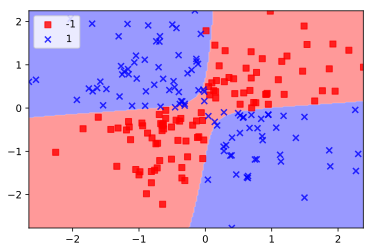

In [252]:
svm = SVC(kernel='rbf',random_state=0,gamma=0.10,C=10.0)
svm.fit(X_xor,y_xor)
plotDecisionRegions.plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')

如果我们减小$\gamma$的值，将会增加受影响的训练样本的范围，这将导致决策边界更加宽松。为了对$\gamma$有个更好的直观认识，我们将基于RBF核的SVM应用于鸢尾花数据集。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


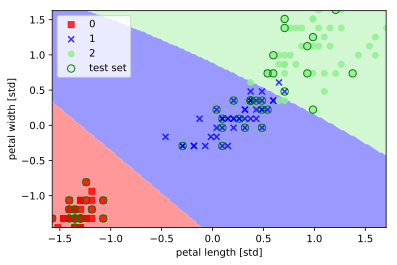

In [253]:
svm = SVC(kernel='rbf',random_state=0,gamma=0.2,C=1.0)
svm.fit(X_train_std,y_train)
plotDecisionRegions.plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')

增加$\gamma$的值,观察对决策边界的影响

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


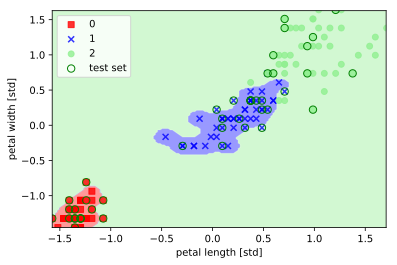

In [254]:
svm = SVC(kernel='rbf',random_state=0,gamma=100,C=1.0)
svm.fit(X_train_std,y_train)
plotDecisionRegions.plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')

虽然模型对训练数据的拟合非常好，但是类似的分类器对未知数据会有一个较高的泛化误差，这说明对γ的调优在控制过拟合方面也起到了重要作用。

## 决策树

为了更直观的对比三种纯度度量标准,下面绘制关于类别1在可能性范围[0,1]下的不纯指数

Text(0, 0.5, 'Impurity Index')

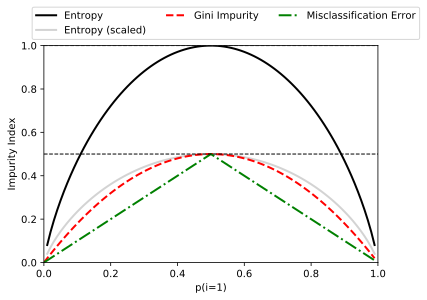

In [255]:
def gini(p):
    return p*(1-p) + (1-p)*p
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)
def error(p):
    return 1-np.max([p,1-p])

x = np.arange(0,1,0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i,lab,ls,c in zip([ent,sc_ent,gini(x),err],
                     ['Entropy', 'Entropy (scaled)','Gini Impurity','Misclassification Error'],
                     ['-', '-', '--', '-.'],
                     ['black', 'lightgray','red', 'green', 'cyan']):
    line = ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)

ax.legend(loc='upper left',bbox_to_anchor=(-0.05,1.2),ncol=3,fancybox=True,shadow=False)
ax.axhline(y=0.5,linewidth=1,color='k',linestyle='--')
ax.axhline(y=1,linewidth=1,color='k',linestyle='--')
plt.ylim(0,1,1)
plt.xlim(0,1)
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')

### 构造一个决策树

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


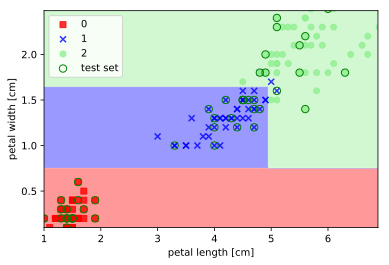

In [256]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plotDecisionRegions.plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

导出.dot文件,通过graphviz进行可视化

In [257]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',feature_names=['petal length','petal width'])

`dot -Tpng tree.dot -o tree.png`

![tree.png](tree.png)

### 随机森林

使用scikit-learn实现一个随机森林分类器

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


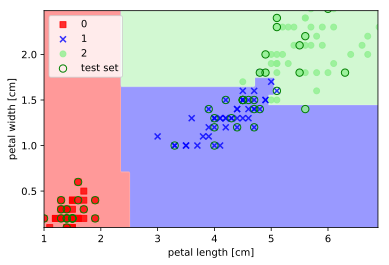

In [258]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=1,n_jobs=2)
forest.fit(X_train,y_train)
plotDecisionRegions.plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

n_estimators=10 : 代表由10个决策树集成的随机森林<br>
n_jobs=2 : 说明利用计算机的两个核心进行并行模型训练

## K近邻 - 一种懒惰的学习算法

简称KNN

使用欧氏距离来实现KNN模型

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


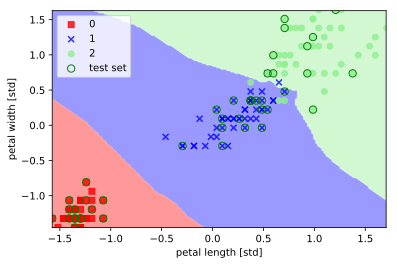

In [259]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski') # p=2,metric='minkowski' => L2范数
knn.fit(X_train_std,y_train)
plotDecisionRegions.plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')

-end-